<a href="https://colab.research.google.com/github/gaaaaaaaaabriel/FreeCodeCamp-Pandas-Real-Life-Example/blob/master/medicion%20I-V%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📂 Sube el archivo de la Medición 1


Saving 8-simple-dark.txt to 8-simple-dark.txt
Archivo cargado: 8-simple-dark.txt
📂 Sube el archivo de la Medición 2


Saving pp-1-dark.txt to pp-1-dark.txt
Archivo cargado: pp-1-dark.txt
✅ Medición 1: Pendiente m = 9.201570e-03 A/V
   Resistencia R = 108.677107 Ω
Introduce el área transversal (m²) para Medición 1: 0.05
Introduce la longitud entre contactos (m) para Medición 1: 0.1
   Resistividad ρ = 5.433855e+01 Ω·m
✅ Medición 2: Pendiente m = 6.910002e-02 A/V
   Resistencia R = 14.471777 Ω
Introduce el área transversal (m²) para Medición 2: 0.005
Introduce la longitud entre contactos (m) para Medición 2: 0.01
   Resistividad ρ = 7.235888e+00 Ω·m


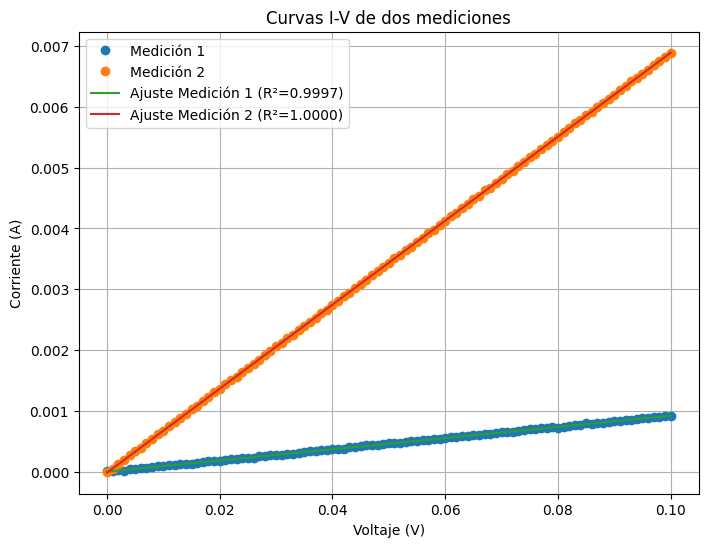

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from google.colab import files

# --- Cargar archivos desde Colab ---
print("📂 Sube el archivo de la Medición 1")
uploaded1 = files.upload()
nombre1 = list(uploaded1.keys())[0]
print(f"Archivo cargado: {nombre1}")

print("📂 Sube el archivo de la Medición 2")
uploaded2 = files.upload()
nombre2 = list(uploaded2.keys())[0]
print(f"Archivo cargado: {nombre2}")

# --- Leer datos ---
V1, I1 = np.loadtxt(nombre1, unpack=True)
V2, I2 = np.loadtxt(nombre2, unpack=True)

# --- Graficar ---
plt.figure(figsize=(8,6))
plt.plot(V1, I1, 'o', label='Medición 1')
plt.plot(V2, I2, 'o', label='Medición 2')
plt.xlabel("Voltaje (V)")
plt.ylabel("Corriente (A)")
plt.title("Curvas I-V de dos mediciones")
plt.grid(True)

# --- Función para procesar cada medición ---
def procesar_medicion(V, I, etiqueta):
    slope, intercept, r_value, p_value, std_err = linregress(V, I)
    I_fit = slope * V + intercept
    plt.plot(V, I_fit, label=f"Ajuste {etiqueta} (R²={r_value**2:.4f})")

    if r_value**2 < 0.95:
        print(f"❌ {etiqueta}: No es lineal → No es óhmico, resistencia no constante.")
    else:
        R = 1 / slope
        print(f"✅ {etiqueta}: Pendiente m = {slope:.6e} A/V")
        print(f"   Resistencia R = {R:.6f} Ω")
        A = float(input(f"Introduce el área transversal (m²) para {etiqueta}: "))
        L = float(input(f"Introduce la longitud entre contactos (m) para {etiqueta}: "))
        rho = R * A / L
        print(f"   Resistividad ρ = {rho:.6e} Ω·m")

# --- Procesar ambas ---
procesar_medicion(V1, I1, "Medición 1")
procesar_medicion(V2, I2, "Medición 2")

plt.legend()
plt.show()